In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
#following the example given in http://ramiro.org/notebook/basemap-choropleth/
import seaborn as sns
import pandas as pd
import gensim
import nltk
import re
import string
from curses.ascii import isprint
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [14]:
corpus = gensim.corpora.MmCorpus('models/corpus.mm')
dictionary = gensim.corpora.Dictionary.load('models/dictionary.dict')
lda = gensim.models.LdaModel.load('models/emails_lda.model')

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from geonamescache.mappers import country

mapper = country(from_key='iso3', to_key='name')

filename = 'csv/ag.lnd.frst.zs_Indicator_en_csv_v2/ag.lnd.frst.zs_Indicator_en_csv_v2.csv'
shapefile = '/media/currough/7AA2EDD11444413C/Documents/PHD Y1/Q3/CS274B/FP/pgm_project/maps/ne_10m_admin_0_countries'
num_colors = 9
year = '2012'
cols = ['Country Name', 'Country Code', year]
title = 'Forest area as percentage of land area in {}'.format(year)

In [16]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [17]:
values = range(len(iso3_codes))
cm = plt.get_cmap('Greens')
scheme = [cm(float(i) / num_colors) for i in range(num_colors)]
bins = np.linspace(min(values), max(values), num_colors)

In [18]:
def country_to_value(country, topics):
    cscores = lda.get_document_topics(dictionary.doc2bow([country]))
    return sum([item[1] for item in cscores if item[0] in topics])
        

In [19]:
list_of_terms = ['terror', 'war', 'terrorism']
length = 3

In [26]:
def terms_to_map(list_of_terms, length):
    topics = [item[0] for item in sorted(lda.get_document_topics(dictionary.doc2bow(list_of_terms)), key = lambda x: -x[1])[:length]]
    fig = plt.figure(figsize=(22, 12))
    ax = fig.add_subplot(111, axisbg='w', frame_on=False)

    m = Basemap(lon_0=0, projection='robin')
    m.drawmapboundary(color='w')

    m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
    for info, shape in zip(m.units_info, m.units):
        iso3 = info['ADM0_A3']
        if mapper(iso3):        
            color = cm(country_to_value(mapper(iso3).lower(),topics))
        else:
            color = (.1, .1, .1, 1.0)
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)
    plt.savefig(''.join(list_of_terms)+'.png')

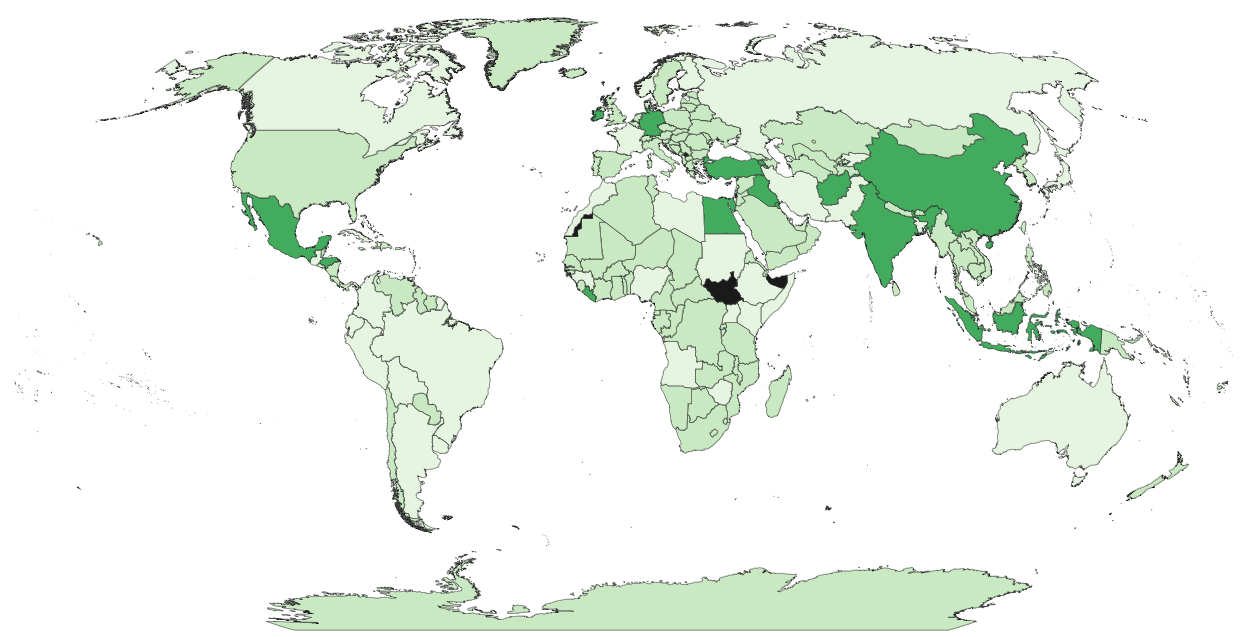

In [27]:
terms_to_map(['immigration'], 5)

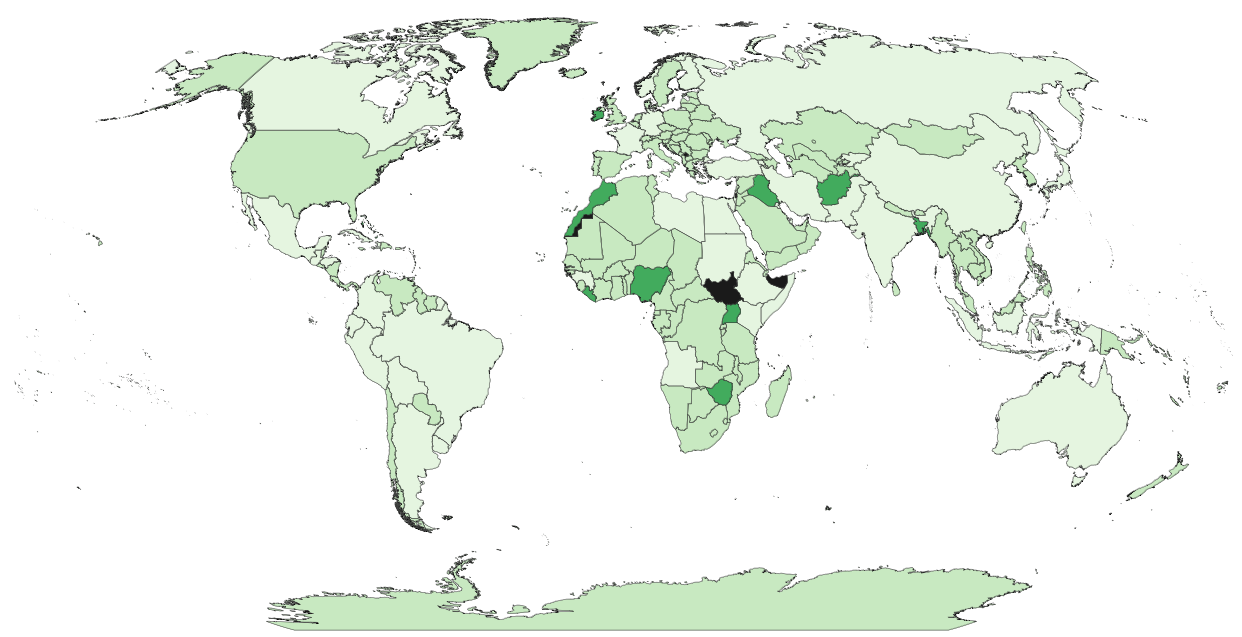

In [28]:
terms_to_map(['war'], 5)

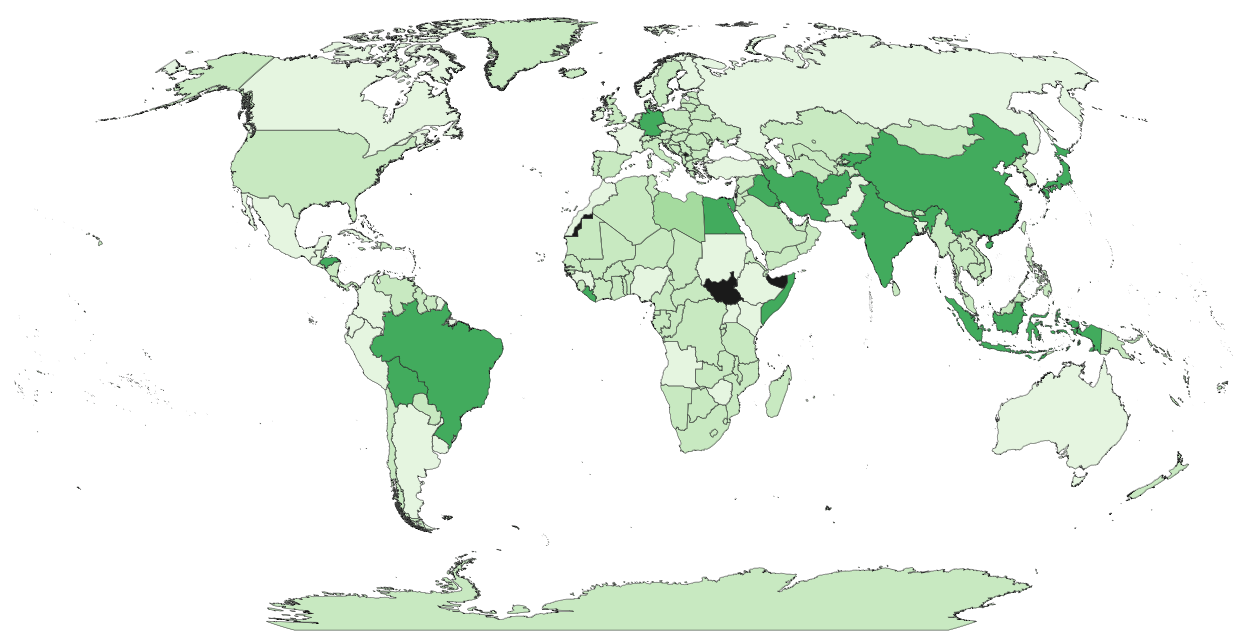

In [29]:
terms_to_map(['election'], 5)

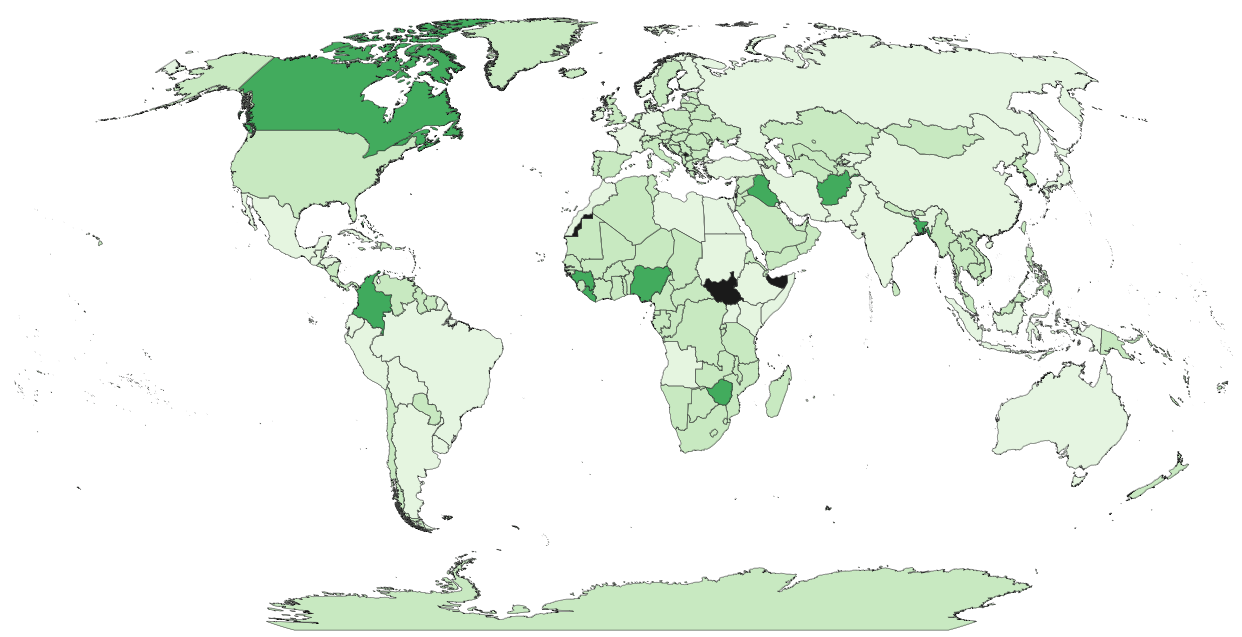

In [30]:
terms_to_map(['clinton'], 5)